In [2]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# single file
fpath = 'C:\Master\data\cmems_data\multiobs_001.nc'
#fpath = 'C:/Master/data/cmems_data/test_001.nc'
ds = xr.open_dataset(fpath)
sst = ds.to
height = ds.zo
lon = ds.longitude
lat = ds.latitude

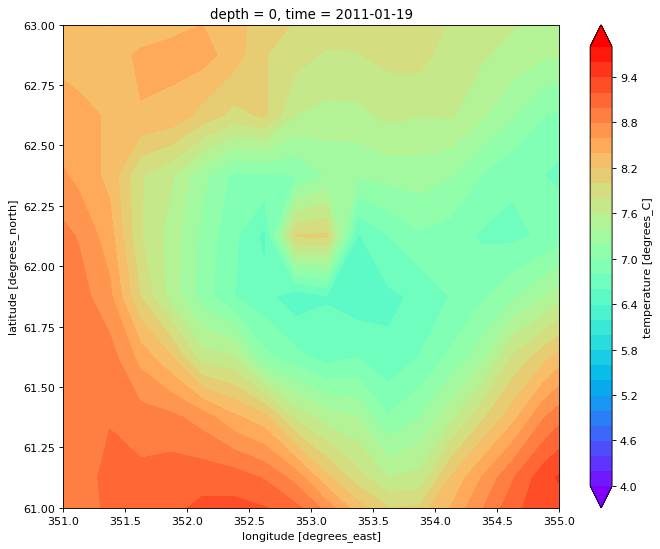

In [101]:
fig=plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='w', )
levels = np.arange(4,10,0.2)
sst[0,0].plot.contourf(add_colorbar=True, levels=levels, cmap='rainbow', xlim=[351,355], ylim=[61, 63])

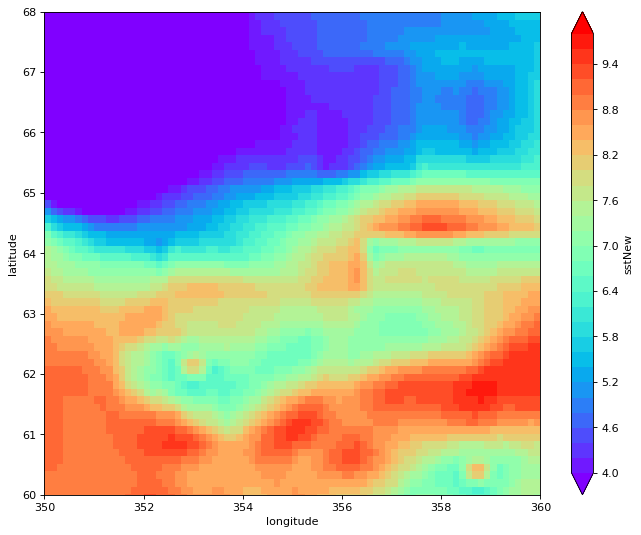

In [100]:
from scipy.interpolate import interp2d
from scipy.interpolate import griddata
import cv2

#func = interp2d(lat, lon, sst, kind='cubic')
#func = griddata(lat, lon, sst, kind='cubic')

latNew = np.linspace(lat[0], lat[-1], lat.size*2)
lonNew = np.linspace(lon[0], lon[-1], lon.size*2)

#sstNew = func(lonNew, latNew)
#np.resize(sstNew, (lonNew.size, latNew.size))
#sstNew.size

sstNew = cv2.resize(sst[0][0].values, dsize=(lonNew.size, latNew.size), interpolation=cv2.INTER_CUBIC)
sstNewDS = xr.Dataset({'sstNew': (('latitude', 'longitude'), sstNew)}).sstNew
sstNewDS['latitude'] = latNew; 
sstNewDS['longitude'] = lonNew

fig=plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='w')
sstNewDS.plot(add_colorbar=True, levels=levels, cmap='rainbow', xlim=[350,360], ylim=[60, 68])

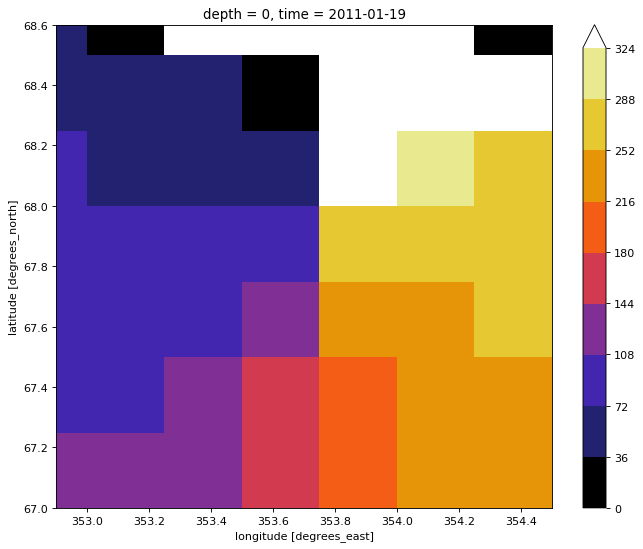

In [193]:
u = ds['ugo'][0][0]
v = ds['vgo'][0][0]
with np.errstate(all='ignore'):
    phase_angle = xr.ufuncs.rad2deg( xr.ufuncs.arctan2(v, u) ) + 180
    
fig=plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='w')
levels = np.arange(0,360,36)
phase_angle.plot(cmap='CMRmap', levels=levels, xlim=[352.9,354.5], ylim=[67, 68.6])

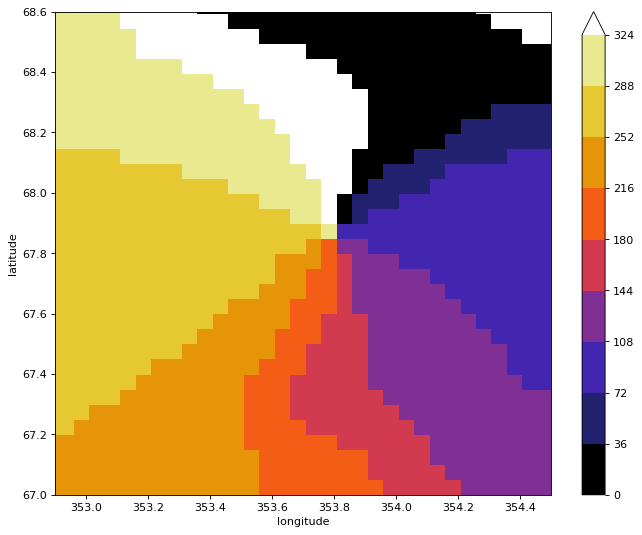

In [234]:
from scipy.interpolate import interp2d
from scipy.interpolate import griddata
import cv2

latNew = np.linspace(lat[0], lat[-1], lat.size*5)
lonNew = np.linspace(lon[0], lon[-1], lon.size*5)

u = ds['ugo'][0][0]
v = ds['vgo'][0][0]
u_new = cv2.resize(u.values, dsize=(lonNew.size, latNew.size), interpolation=cv2.INTER_CUBIC)
u_new = xr.Dataset({'u_new': (('latitude', 'longitude'), u_new)}).u_new
u_new['latitude'], u_new['longitude']  = latNew, lonNew; 
v_new = cv2.resize(v.values, dsize=(lonNew.size, latNew.size), interpolation=cv2.INTER_CUBIC)
v_new = xr.Dataset({'v_new': (('latitude', 'longitude'), v_new)}).v_new
v_new['latitude'], v_new['longitude']  = latNew, lonNew; 

with np.errstate(all='ignore'):
    phase_angle_new = xr.ufuncs.rad2deg( xr.ufuncs.arctan2(v_new, u_new) ) + 180

fig=plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='w')
levels = np.arange(0,360,36)
(phase_angle_new*(-1)+360).plot(cmap='CMRmap', levels=levels, xlim=[352.9,354.5], ylim=[67, 68.6])

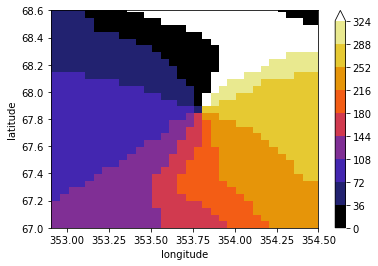

In [235]:
phase_angle_new.plot(cmap='CMRmap', levels=levels, xlim=[352.9,354.5], ylim=[67, 68.6])

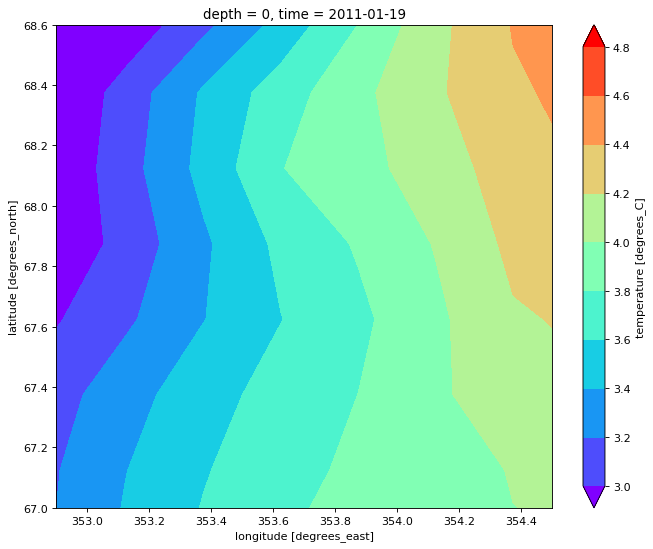

In [6]:
fig=plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='w', )
levels = np.arange(3,5,0.2)
sst[0,0].plot.contourf(add_colorbar=True, levels=levels, cmap='rainbow', xlim=[352.9,354.5], ylim=[67, 68.6])

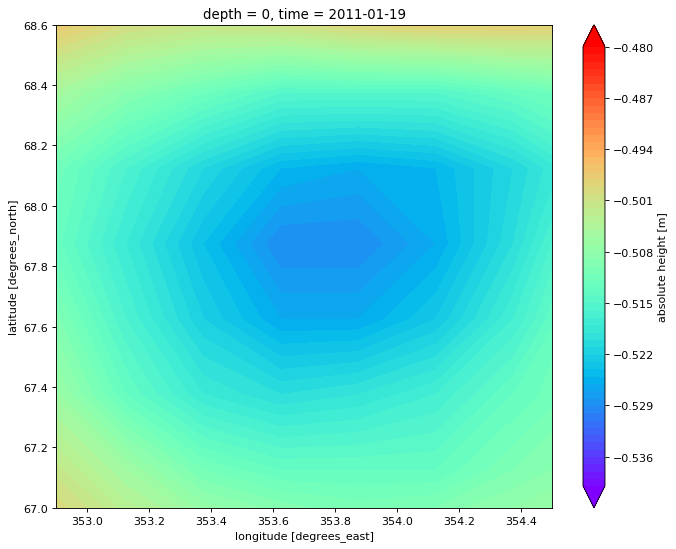

In [3]:
fig=plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='w', )
levels = np.arange(-0.54,-0.48,0.001)
height[0,0].plot.contourf(add_colorbar=True, levels=levels, cmap='rainbow', xlim=[352.9,354.5], ylim=[67, 68.6])

In [6]:
phase_angle.rename('phase_angle')
phase_angle.to_netcdf('C:\Master\data\cmems_data\phase_angle_001.nc')

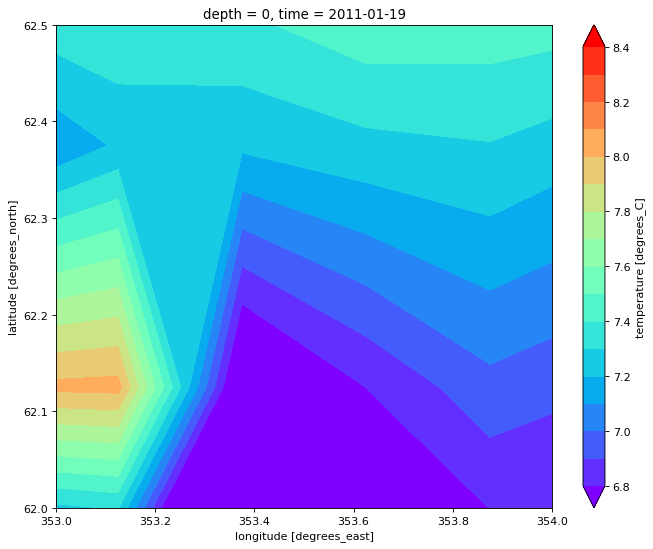

In [186]:
from matplotlib.colors import LogNorm
levels = np.arange(6.8,8.4,0.1)
fig=plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='w')
sst[0,0].plot.contourf(add_colorbar=True, levels=levels, cmap='rainbow', xlim=[353,354], ylim=[62, 62.5])#, norm = LogNorm())

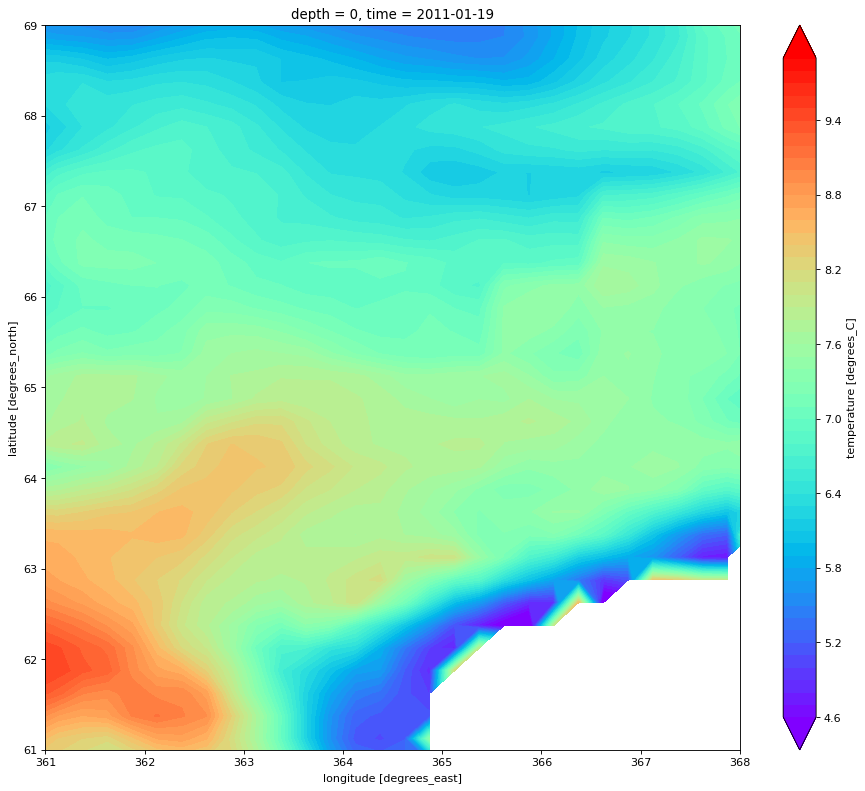

In [127]:
levels = np.arange(4.6,10,0.1)
fig=plt.figure(figsize=(14, 12), dpi= 80, facecolor='w', edgecolor='w')
sst[0,0].plot.contourf(add_colorbar=True, levels=levels, cmap='rainbow', xlim=[361,368], ylim=[61, 69])#, norm = LogNorm())